# The goal of this code is to extract metrics regarding image and annotation quality

In [1]:
 import os
# The path below should point to the directory containing this notebook and the associated utility files
# Change it if necessary
os.chdir('/home/sohini/U-net_multi-class/Paper-work/Lung-Data/covid-19-med/')
!ls

GT  Images


## Here, we see the input images are contained in folder db1_fundusimages

In [2]:
files=(os.listdir('./Images/'))
print(len(files))

100


## Properties extracted per image:
* VOL (blurriness score)
* PSNR upon median filtering (to define foreground signal strength, higher better)

In [3]:
# import the necessary packages
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2
from scipy import ndimage, misc
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()
 

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [7]:
blurriness=np.zeros(len(files))
SSIM=np.zeros((len(files),len(files)))
img_psnr=np.zeros(len(files))
print("Image#,       blurriness index,        PSNR")
for i in range(len(files)):
  
  img=cv2.imread('./Images/'+files[i])
  img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray=(img_gray-np.min(img_gray))/np.ptp(img_gray)
  print(i, np.max(img_gray))
  blurriness[i]=variance_of_laplacian(img_gray)
  img_filt=ndimage.median_filter(img_gray, size=20)
  img_psnr[i]=PSNR(img_gray,img_filt)
  #print(files[i],'\t', blurriness[i],'\t', img_psnr[i])
  





Image#,       blurriness index,        PSNR
0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


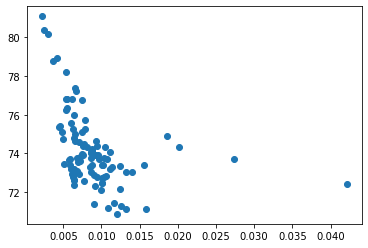

In [8]:
plt.scatter(blurriness,img_psnr)

In [9]:
print(np.percentile(blurriness, [20,80]),np.percentile(img_psnr, [10,90]))

[0.0061403  0.01045011] [72.33730546 76.81243509]


# High blurriness and PSNR are better!
Bad images: 85, 70, 88, 90, 91

# Based on blurriness, we can select 5-10 images for training with high Laplacian covariance and PSNR scores.

# Next, we evaluate quality of annotated regions
* mean pixel value
* coefficient if variation (sigma/mu)

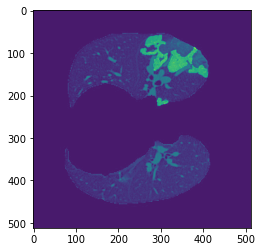

In [10]:
# First, we visualize the overlays
for i in range(40):#run till len(files)
  img=cv2.imread('./Images/'+files[i])
  img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  GT=cv2.imread('./GT/'+files[i])
  GT_gray=cv2.cvtColor(GT, cv2.COLOR_BGR2GRAY)
  dst = cv2.addWeighted(img_gray, 0.5, GT_gray, 0.5, 0.0)
  plt.imshow(dst)
  

In [11]:
mean_pix=np.zeros(len(files))
cov=np.zeros(len(files))
print('Image #,            Mean Pixel,          Coefficient of Variation')
for i in range(len(files)):
    print(i)
    img=cv2.imread('./Images/'+files[i])
    img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray=(img_gray-np.min(img_gray))/np.ptp(img_gray)
    GT=cv2.imread('./GT/'+files[i])
    GT_gray=cv2.cvtColor(GT, cv2.COLOR_BGR2GRAY)
    pixl=img_gray*GT_gray
    mean_pix[i]=np.mean(pixl)
    cov[i]=np.std(pixl)/mean_pix[i]
  #print(files[i], '\t', mean_pix[i], '\t', cov[i])

Image #,            Mean Pixel,          Coefficient of Variation
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


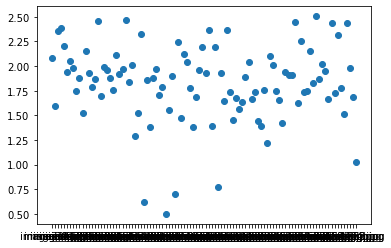

In [12]:
plt.scatter(files,cov)

In [13]:
print(np.percentile(cov, [25,50,75]))

[1.65980973 1.8721458  2.03822688]


# Based on this, we select the images with high variations in pixel intensities for ML training.

# Once model is trained, we save the overlays and create a video out of the sequence!

In [12]:
for i in range(len(files)):
  img=cv2.imread('./cirrus_2/test/Image/'+files[i])
  img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  GT=cv2.imread('./cirrus_2/test/GT/'+files[i])
  GT_gray=cv2.cvtColor(GT, cv2.COLOR_BGR2GRAY)
  dst = cv2.addWeighted(img_gray, 0.5, GT_gray, 0.5, 0.0)
  print('writing file',i)
  cv2.imwrite('./cirrus_2/test/overlay/'+files[i],dst)


writing file 0
writing file 1
writing file 2
writing file 3
writing file 4
writing file 5
writing file 6
writing file 7
writing file 8
writing file 9
writing file 10
writing file 11
writing file 12
writing file 13
writing file 14
writing file 15
writing file 16
writing file 17
writing file 18
writing file 19
writing file 20
writing file 21
writing file 22
writing file 23
writing file 24


In [13]:
from os.path import isfile, join
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    #for sorting the file names properly
    files.sort(key = lambda x: int(x[6:-4]))
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()
def main():
    pathIn= './cirrus_2/test/overlay/'
    pathOut = 'video.avi'
    fps = 2.0
    convert_frames_to_video(pathIn, pathOut, fps)
if __name__=="__main__":
    main()

./cirrus_2/test/overlay/bscan_69.jpg
./cirrus_2/test/overlay/bscan_70.jpg
./cirrus_2/test/overlay/bscan_72.jpg
./cirrus_2/test/overlay/bscan_73.jpg
./cirrus_2/test/overlay/bscan_74.jpg
./cirrus_2/test/overlay/bscan_75.jpg
./cirrus_2/test/overlay/bscan_76.jpg
./cirrus_2/test/overlay/bscan_77.jpg
./cirrus_2/test/overlay/bscan_78.jpg
./cirrus_2/test/overlay/bscan_79.jpg
./cirrus_2/test/overlay/bscan_80.jpg
./cirrus_2/test/overlay/bscan_81.jpg
./cirrus_2/test/overlay/bscan_82.jpg
./cirrus_2/test/overlay/bscan_83.jpg
./cirrus_2/test/overlay/bscan_84.jpg
./cirrus_2/test/overlay/bscan_85.jpg
./cirrus_2/test/overlay/bscan_86.jpg
./cirrus_2/test/overlay/bscan_87.jpg
./cirrus_2/test/overlay/bscan_88.jpg
./cirrus_2/test/overlay/bscan_89.jpg
./cirrus_2/test/overlay/bscan_90.jpg
./cirrus_2/test/overlay/bscan_91.jpg
./cirrus_2/test/overlay/bscan_96.jpg
./cirrus_2/test/overlay/bscan_97.jpg
./cirrus_2/test/overlay/bscan_98.jpg
